In [172]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import community
from networkx.algorithms import community as comm

In [173]:
data = pd.read_csv('/home/tripti/Desktop/Vivek/NSW/Project/GOT/GOTFollowerEdgeList.csv')
G = nx.DiGraph()
for i in data.index:
    u = str(data['source'][i])
    v = str(data['target'][i])
    G.add_edge(v, u)

In [174]:
#Use this method for Undirected graph
def detectCommunities(G_fb, layout):
 
    parts = community.best_partition(G_fb) #Finds Communities for the network
    
    #plots the grap
    values = [parts.get(node) for node in G_fb.nodes()]

    figsize = (25, 25)
    fig = plt.figure(figsize=figsize)
#     ax = fig.add_subplot(1, 1, 1)
                         
    plt.axis("off")
    nx.draw_networkx(G_fb, pos = layout, 
                     cmap = plt.get_cmap("jet"),
                     node_color = values,
                     node_size = 400, 
                     with_labels = True
                    )
    plt.savefig("communities.png", format = "PNG")
    return parts

#Use this method for directed graph
def findCommunities(G, layout):
    communities_generator = comm.girvan_newman(G)
    top_level_communities = next(communities_generator)
    communities = {}
    communintyNumber = 0
    for group in top_level_communities:
        communintyNumber +=1
        for screenName in group:
            communities[screenName] = communintyNumber
    values = [communities.get(node) for node in G.nodes()]
    figsize = (25, 25)
    fig = plt.figure(figsize=figsize)
                         
    plt.axis("off")
    nx.draw_networkx(G, pos = layout, 
                     cmap = plt.get_cmap("jet"),
                     node_color = values,
                     node_size = 500, 
                     with_labels = True
                    )
    plt.savefig("follower_communities.png", format = "PNG")
    return communities

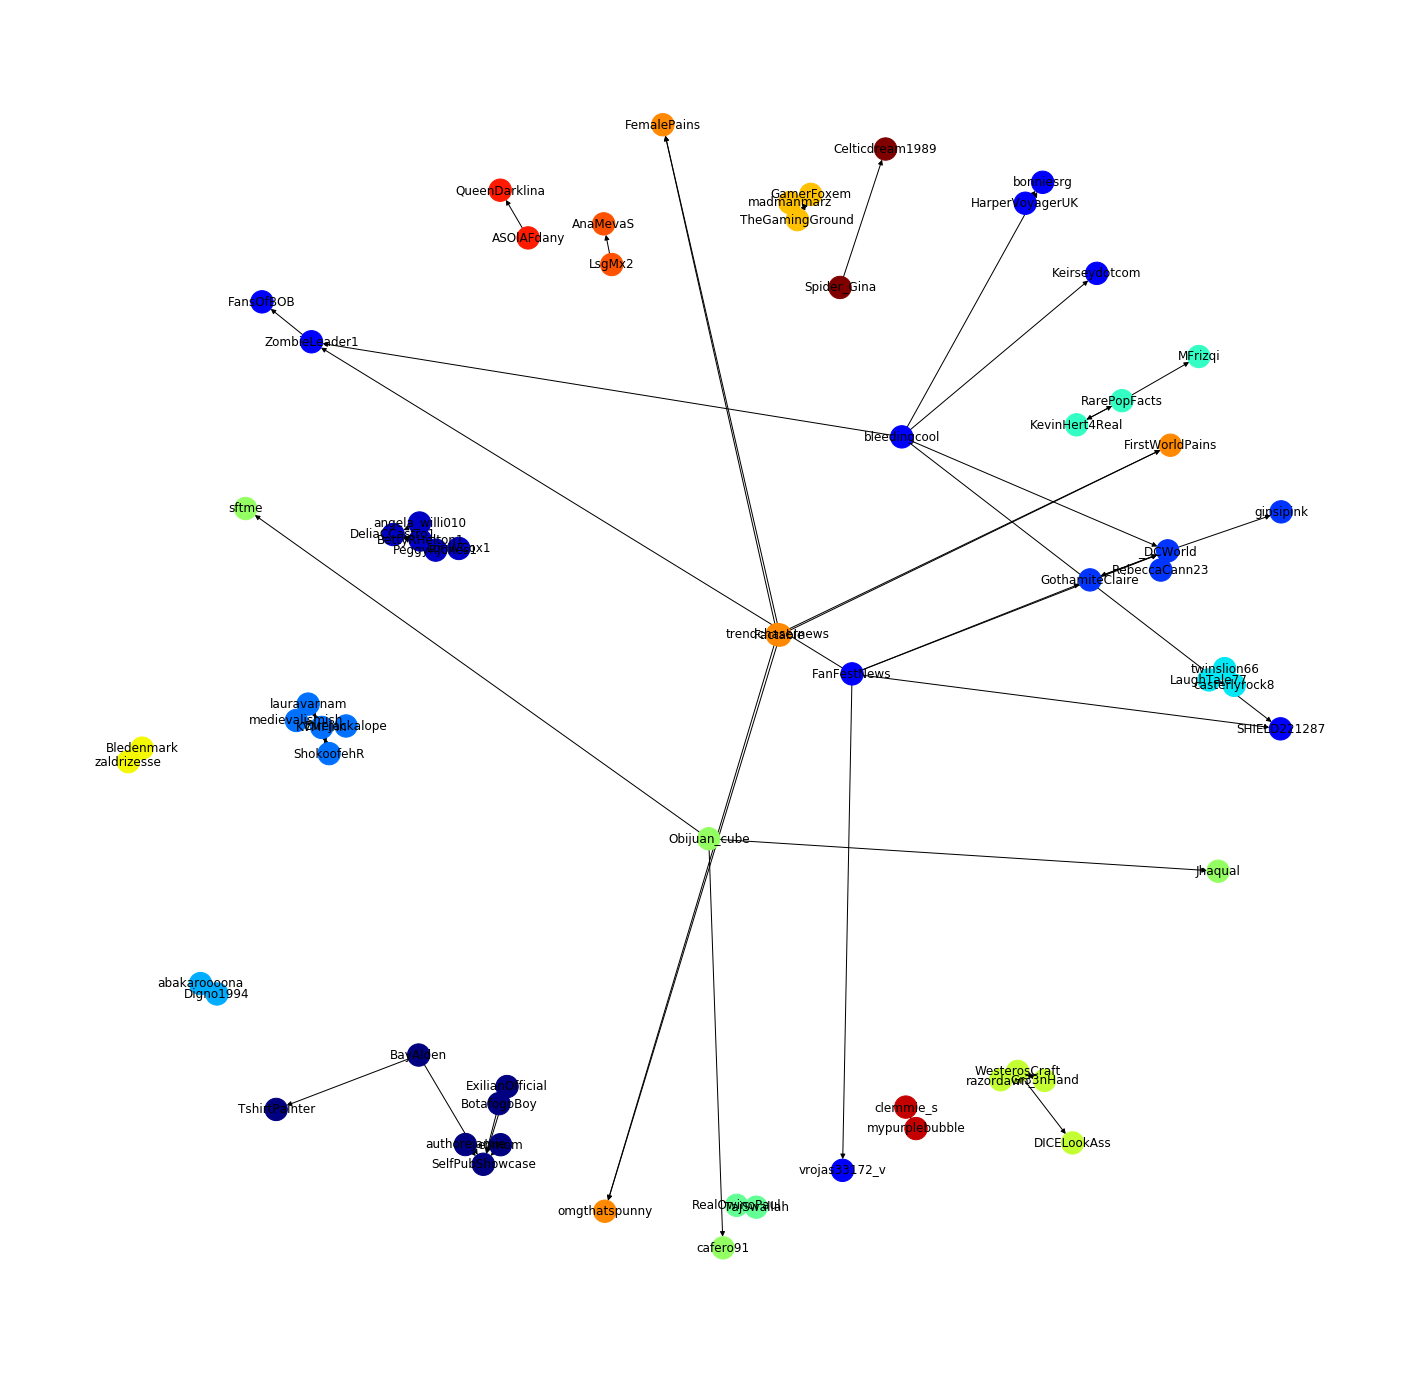

In [175]:
spring_pos = nx.spring_layout(G, k = 0.1)
# parts = detectCommunities(G, spring_pos)
top_level_communities = findCommunities(G, spring_pos)